## 5.5 Homework: 
Calculate the following integral based on three different rules (rectangle, trapezoidal, Simpson)

$$\int_0^3 (x^2-x+1) dx$$

$$\int_0^3 (x^4-x+1) dx$$

$$\int_0^3 \text{exp}(-x^2) dx$$

For the 1st one, how many sampling points do you need for Simpson rule?

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

def Rectangle(f, start, end, parts, plot=1):
    """
    Rectangle sum rule
    
    """
    
    #define the X,Y points
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts)
    resultsy = f(resultsx)
    
    # To calculate the area
    area = np.empty([parts], float)
    for i in range(parts):
            area[i] = resultsy[i] * deltax
    

    # By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = x*x        
        plt.plot(x, y, 'r')
        #plt.xlim([start,end])
        plt.bar(resultsx+deltax/2, resultsy, deltax, edgecolor ='black')
        #plt.bar(resultsx, resultsy, deltax, edgecolor ='black')
        plt.show()
        print("The Sum of the area is: ", sum(area))
    
    return sum(area)

def trapezoidal(f, start, end, parts, plot = 1):

    """
    Trapezoid sum rule
    
    """
    
    #define the X, Y points 
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)

    # To calculate the area
    area = np.empty([parts], float)
    for i in range(parts):
            area[i] = (resultsy[i]+resultsy[i+1]) * deltax/2

    # By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        plt.xlim([start,end])
        
        y2 = np.array([0,0])
        for i in range(parts):
            x0 = resultsx[i:i+2]
            y1 = resultsy[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='blue')
            linex, liney = [resultsx[i+1], resultsx[i+1]], [0, resultsy[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)        
        
        plt.show()
        print("The Sum of the area is: ", sum(area))
    
    return sum(area)

def simpson(f, start, end, parts, plot=1):
    """
    Simpson sum rule
    
    """
  
    #define the X, Y points 
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)
    
    area = np.empty([parts+1], float)
    
    for i in range(parts+1):
        if i == 0 or i == parts:
            coef = 1/3
        elif i%2 == 1:
            coef = 4/3
        else: 
            coef = 2/3
        area[i] = coef*resultsy[i]*deltax
    return sum(area)



$$\int_0^3 (x^2-x+1) dx$$

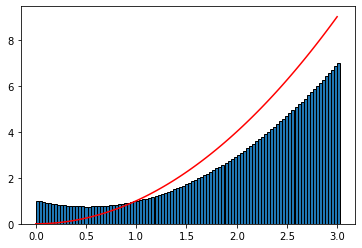

The Sum of the area is:  7.545454545454545


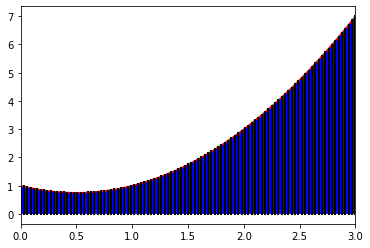

The Sum of the area is:  7.500450000000001


7.499999999999997

In [58]:
f = lambda x: x**2 - x + 1

Rectangle(f, 0, 3, 100)
trapezoidal(f, 0, 3, 100)
simpson(f, 0, 3, 100)

$$\int_0^3 (x^4-x+1) dx$$

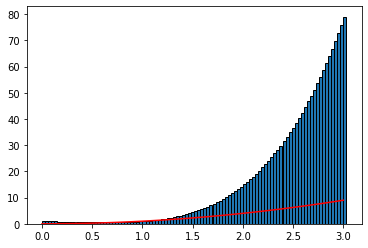

The Sum of the area is:  47.83718173470238


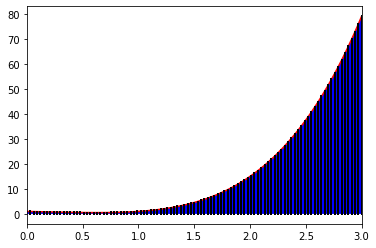

The Sum of the area is:  47.108099919


47.10000032399998

In [59]:
f = lambda x: x**4 - x + 1

Rectangle(f, 0, 3, 100)
trapezoidal(f, 0, 3, 100)
simpson(f, 0, 3, 100)

$$\int_0^3 \text{exp}(-x^2) dx$$


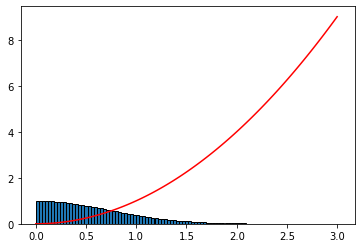

The Sum of the area is:  0.892347069854365


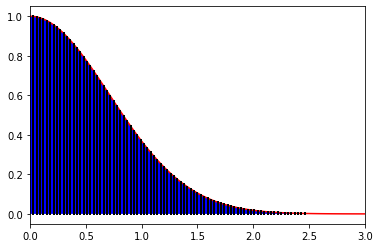

The Sum of the area is:  0.8862072927500886


0.8862073481597857

In [61]:
f = lambda x: np.exp(-(x**2))

Rectangle(f, 0, 3, 100)
trapezoidal(f, 0, 3, 100)
simpson(f, 0, 3, 100)